# Business Case Pepsico

## Context
You have been assigned to support a new area of Business Reporting. As a team, we are constantly asked
to process new information and creating tools for our clients that will help them make better decisions for
the company. Accuracy and timeliness are critical, and you have been told that errors will quickly cause the
business to lose confidence in the new team. In the long-term, your objective is to simplify and find more
efficient ways to deliver reports to the business. You recognize that the current reports are very manual
and do not provide many insights to the data.

### Import libraries

To analyze and work with the files, we need to import some libreries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
app_review = pd.read_csv('googleplaystore_user_reviews.csv')
app_info = pd.read_csv('googleplaystore.csv')

### Analizing the first dataset 

In [3]:
app_review.head()

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


The file "Google play store user reviews" contains the following information:

App: The name of the app

Translated_Review : The review from the user

Sentiment : The sentiment analysis from the user, we have 3, Positive, Negative or Neutral.

Sentiment_Polarity: The value from the sentiment, in this case, 1 is for positive review and 0 is a negative review.

Sentiment_Subjectivity: The subjectivity from the review, if it is 0 is personal opinion and if is 1 is more clear review. 

In [4]:
app_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              64295 non-null  int64  
 1   App                     64295 non-null  object 
 2   Translated_Review       37427 non-null  object 
 3   Sentiment               37432 non-null  object 
 4   Sentiment_Polarity      37432 non-null  float64
 5   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.9+ MB


In [5]:
app_review.isna().sum()

Unnamed: 0                    0
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

We have 70% of the data with NA values. So, I analize the data with the NA values, so we can have more accuracy with the information.

### Analizing the second dataset

In [6]:
app_info

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [7]:
app_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As we can see, we need to convert the data type

In [8]:
app_info['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [9]:
app_info['Reviews'] = pd.to_numeric(app_info['Reviews'],errors='coerce')

With to_numeric we can convert to a numeric value and also, if it can not convert to a intiger value it will replace it with NaN values.

In [10]:
app_info['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As we can see, we have numbers with a prefix, so we need to eliminate the prefix and keep the number

In [11]:
app_info['Size_Prefix']=app_info['Size'].str.extract(pat='([a-zA-Z]+)')

In [12]:
app_info['Size_Prefix']

0             M
1             M
2             M
3             M
4             M
          ...  
10836         M
10837         M
10838         M
10839    Varies
10840         M
Name: Size_Prefix, Length: 10841, dtype: object

In [13]:
app_info['Size']=app_info['Size'].str.extract(pat='(\d{1}[\.\,]?\d+)')

In [14]:
app_info['Size']

0         19
1         14
2        8.7
3         25
4        2.8
        ... 
10836     53
10837    3.6
10838    9.5
10839    NaN
10840     19
Name: Size, Length: 10841, dtype: object

In [15]:
app_info['Size']=pd.to_numeric(app_info['Size'],errors='coerce')

In [16]:
app_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_Prefix     10840 non-null  object 
dtypes: float64(3), object(11)
memory usage: 1.2+ MB


In [17]:
app_info['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [18]:
app_info['Price']=app_info['Price'].str.extract(pat='(\d+(?:\.\d+)?)')

In [19]:
app_info['Price']=pd.to_numeric(app_info['Price'], errors='coerce')

In [20]:
app_info['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,    nan,   1.2 ,   1.04])

In [21]:
app_info['Category'] = app_info['Category'].str.lower().str.title()

In [22]:
app_info['Installs']=app_info['Installs'].str.extract(pat='(\d{1}[\.\,]?\d+)')
app_info['Installs']=app_info['Installs'].str.replace(",","")
app_info['Installs']=app_info['Installs'].astype(float)

In [23]:
columns = list(app_info.columns)

In [24]:
new_order = ['App','Category','Rating','Reviews','Size','Size_Prefix','Installs','Type','Price','Content Rating','Genres','Last Updated','Current Ver','Android Ver']
app_info =app_info[new_order]

With the dataset clean, we can look for the information we need.

In [25]:
app_info

,App,Category,Rating,Reviews,Size,Size_Prefix,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,M,10.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,M,500.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art_And_Design,4.7,87510.0,8.7,M,5000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,Art_And_Design,4.5,215644.0,25.0,M,50.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,Art_And_Design,4.3,967.0,2.8,M,100.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,Family,4.5,38.0,53.0,M,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,Family,5.0,4.0,3.6,M,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,Medical,NaN,3.0,9.5,M,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,Books_And_Reference,4.5,114.0,NaN,Varies,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [26]:
app_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            9145 non-null   float64
 5   Size_Prefix     10840 non-null  object 
 6   Installs        10676 non-null  float64
 7   Type            10840 non-null  object 
 8   Price           10840 non-null  float64
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.2+ MB


In [27]:
app_review

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...,...
64290,64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [28]:
app_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              64295 non-null  int64  
 1   App                     64295 non-null  object 
 2   Translated_Review       37427 non-null  object 
 3   Sentiment               37432 non-null  object 
 4   Sentiment_Polarity      37432 non-null  float64
 5   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.9+ MB


We can merge the data using the primary key "App"

In [29]:
app_total = pd.merge(app_info, app_review, on="App", how='outer')

In [30]:
app_total

,App,Category,Rating,Reviews,Size,Size_Prefix,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Unnamed: 0,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art_And_Design,4.1,159.0,19.0,M,10.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,NaN,NaN,NaN,NaN,NaN
1,Coloring book moana,Art_And_Design,3.9,967.0,14.0,M,500.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,28538.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
2,Coloring book moana,Art_And_Design,3.9,967.0,14.0,M,500.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,28539.0,It bad >:(,Negative,-0.725,0.833333
3,Coloring book moana,Art_And_Design,3.9,967.0,14.0,M,500.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,28540.0,like,Neutral,0.000,0.000000
4,Coloring book moana,Art_And_Design,3.9,967.0,14.0,M,500.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,28541.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134705,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62851.0,NaN,NaN,NaN,NaN
134706,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62852.0,NaN,NaN,NaN,NaN
134707,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62853.0,"Good graphics, fun play",Positive,0.500,0.400000
134708,Home Street – Home Design Game,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62854.0,NaN,NaN,NaN,NaN


## Top five app categories.

In [31]:
top_five_cat = app_info.groupby('Category')[['Installs']].sum()
top_five_cat = top_five_cat.reset_index()
top_five_cat = top_five_cat.sort_values('Installs', ascending=False)
top_five_cat = top_five_cat.head(5)
top_five_cat

,Category,Installs
12,Family,1790200.0
15,Game,904640.0
30,Tools,715400.0
29,Sports,436940.0
13,Finance,355900.0


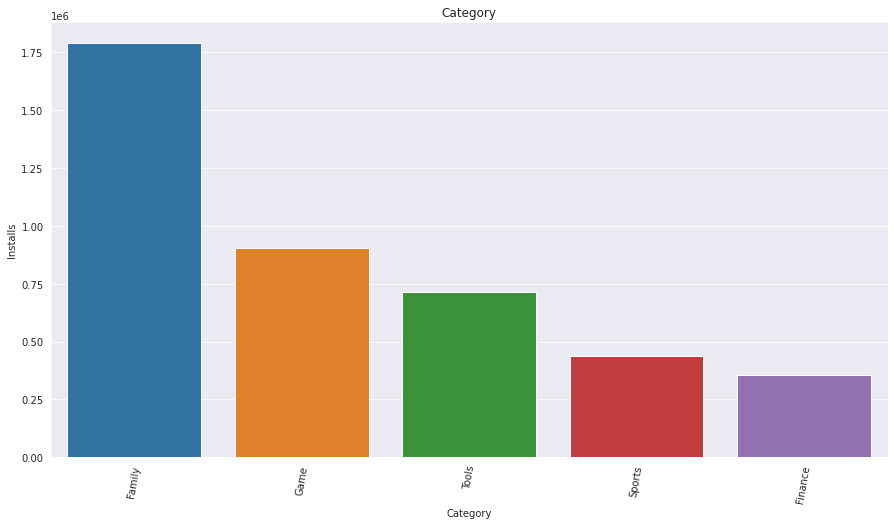

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='Installs',data=top_five_cat)
plt.title('Category')
plt.xticks(rotation=80)
plt.ylabel('Installs')
plt.show()

The category with more installs is Family

## Top five rated apps

In [33]:
top_five_rat = app_info.groupby('Category')[['Rating']].sum()
top_five_rat = top_five_rat.reset_index()
top_five_rat = top_five_rat.sort_values('Rating', ascending=False)
top_five_rat = top_five_rat.head(5)
top_five_rat

,Category,Rating
12,Family,7323.9
15,Game,4702.1
30,Tools,2970.8
26,Productivity,1478.2
21,Medical,1466.2


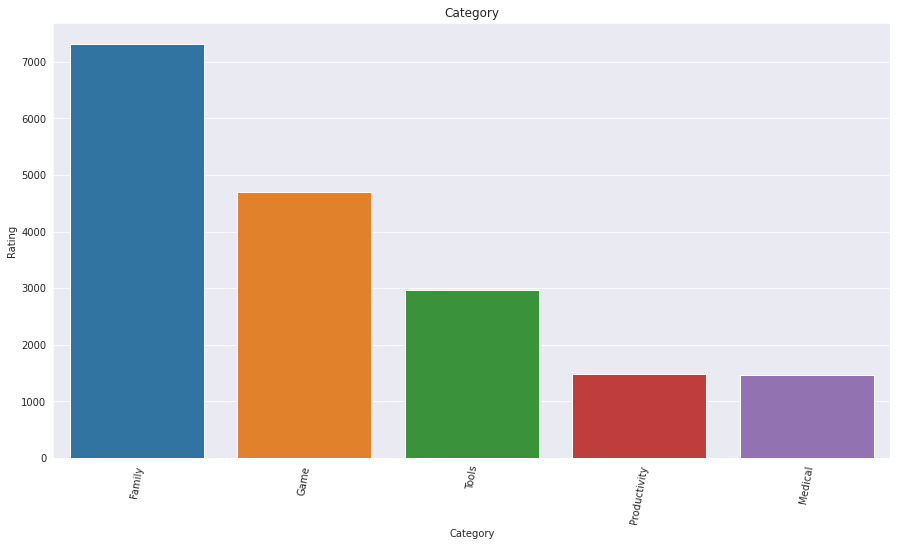

In [34]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='Category', y='Rating',data=top_five_rat)
plt.title('Category')
plt.xticks(rotation=80)
plt.ylabel('Rating')
plt.show()

We can see that Family is also the category with the best rating, as well as Game and Tools. 

## Which app has more reviews?

In [42]:
top_five_rv = app_info.groupby('App')[['Reviews']].count()
top_five_rv= top_five_rv.reset_index()
top_five_rv = top_five_rv.sort_values('Reviews', ascending=False)
top_five_rv = top_five_rv.head(5)
top_five_rv

,App,Reviews
7302,ROBLOX,9
1934,"CBS Sports App - Scores, News, Stats & Watch Live",8
3504,Duolingo: Learn Languages Free,7
3730,ESPN,7
101,8 Ball Pool,7


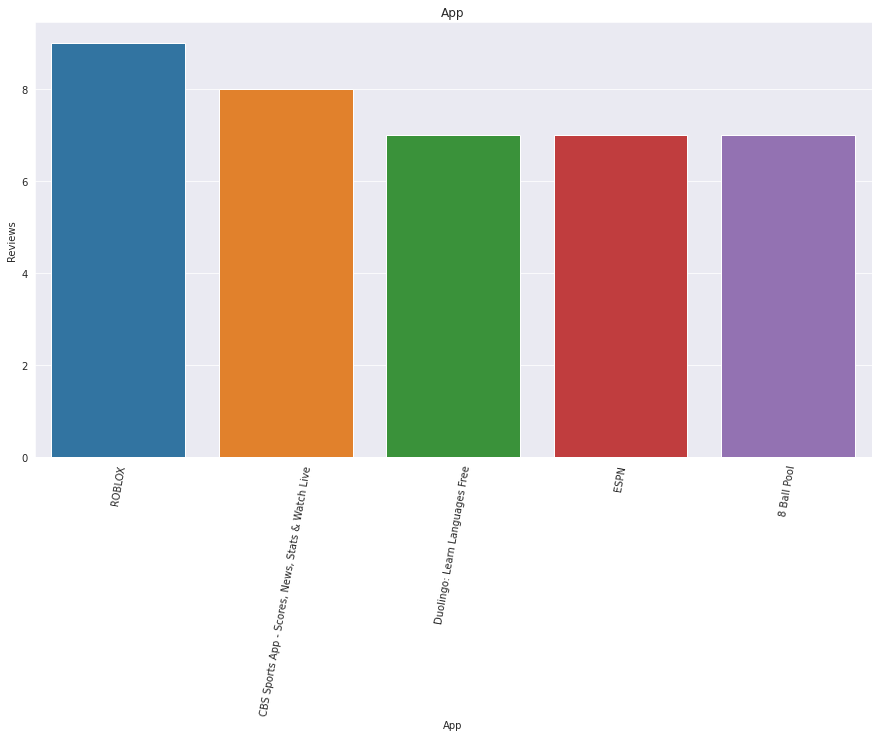

In [44]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='App', y='Reviews',data=top_five_rv)
plt.title('App')
plt.xticks(rotation=80)
plt.ylabel('Reviews')
plt.show()

Again, the category "Family" has more reviews than the others.

## Which app is the least liked by the users?

In [37]:
app_review

,Unnamed: 0,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...,...
64290,64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [38]:
app_least = app_review.query("Sentiment == 'Negative'")
app_least = app_least.groupby('App')['Sentiment'].count()
app_least = app_least.reset_index()
app_least = app_least.sort_values('Sentiment', ascending = False)
app_least=app_least.head(5)

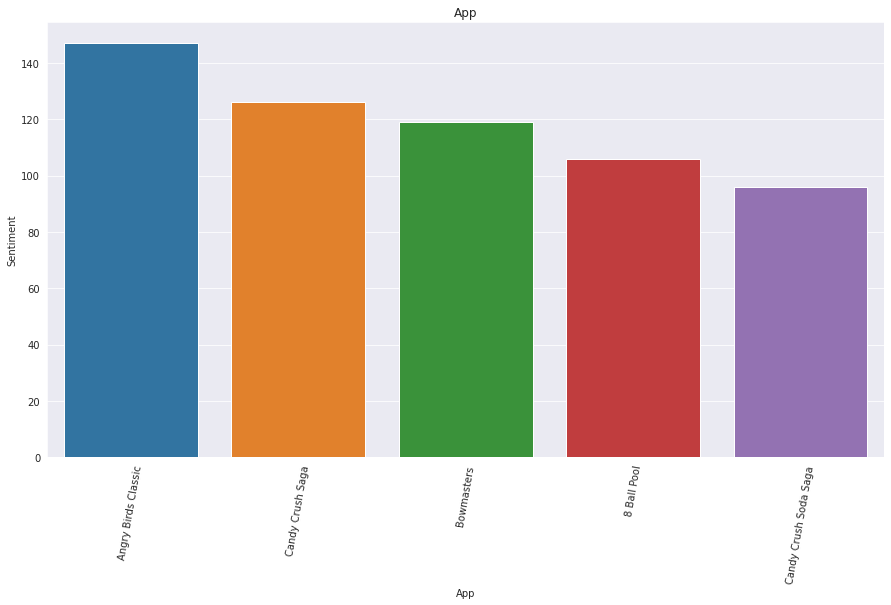

In [39]:
sns.set_style('darkgrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='App', y='Sentiment',data=app_least)
plt.title('App')
plt.xticks(rotation=80)
plt.ylabel('Sentiment')
plt.show()

If we choose to find the least app liked by the user based on the column Sentiment, the app "Angry Birds Classic" is the winner, with more Negative Sentiment. 

With the data clean, now we can extract the information so we can work with the visualization with PowerBI.

In [40]:
app_info.to_csv('googleplaystore2.csv')

In [41]:
app_review.to_csv('googleplaystore_user_reviews2.csv')

# Conclusion


As a conclusion, and in a general manner, the analysis process carried out for the provided dataset will be explained. The ETL (extract, transform, load) process was employed to analyze the data. 

Firstly, in Python, the libraries to be used are imported, and for the initial process, the Pandas library is utilized, which helps extract information from a file, in this case, from files in CSV format. 

Once the information is extracted, we proceed to transform or clean the data. In the case of the "app_review" dataset, there are 6 columns and 64,295 rows. 

The columns are as follows: 
App (providing the application name), Translated Review (the user's review), Sentiment (indicating if the review is positive, negative, or neutral), Sentiment Polarity (with a range where 1 means a positive review and 0 means a negative review), and Sentiment Subjectivity (indicating the level of objectivity in the review, with 0 being a personal review and 1 indicating a review with solid grounds). 

The cleaning process is as follows: We checked for NA data, revealing 26,868 results for the columns "Translated Review," "Sentiment," "Sentiment Polarity," and "Sentiment Subjectivity," indicating an approximate 70% of NA values. To avoid biasing the information, the NA values were left as they are.

For the second dataset "app_info," there are 13 columns and 10,841 rows. 

The columns include App (providing the application name), Category (indicating the application's category), Rating (the application's rating), Reviews (the application's reviews), Size (the application's size), Installs (the number of downloads for the application), Content Rating (the target audience for the application), Genres (the application's genre), Last updated (the application's last update), Current Version (the application's version), and Android Version (the Android version required). 

The cleaning of this dataset involved changing the data type for Reviews, Rating, Size, Installs, and Price, as well as removing prefixes that could hinder proper data usage.

Once the data is cleaned, questions posed are addressed:

What are the top 5 categories?
Family is found to be the category with the highest downloads.

What are the top 5 categories with the best ratings?
Similarly, Family is identified as the category with the highest ratings within the Google Play Store.

Which application has the most reviews?
Roblox is determined to be the application with the most reviews.

Which application has the most negative reviews?
Angry Birds emerges as the application with the most negative reviews.

Having completed the cleaning of the dataset, the data is extracted. This concludes the extraction, transformation, and cleaning of the data.
